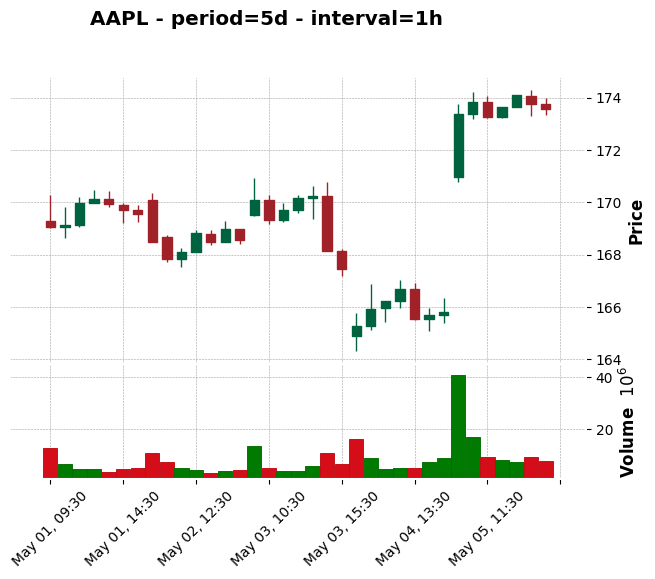

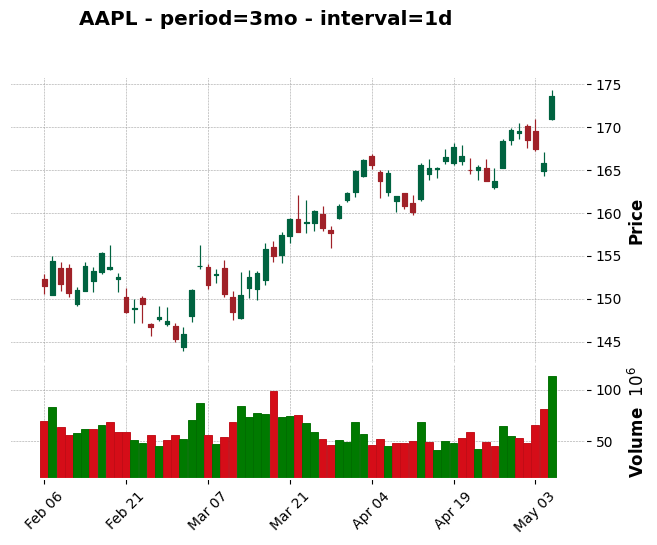

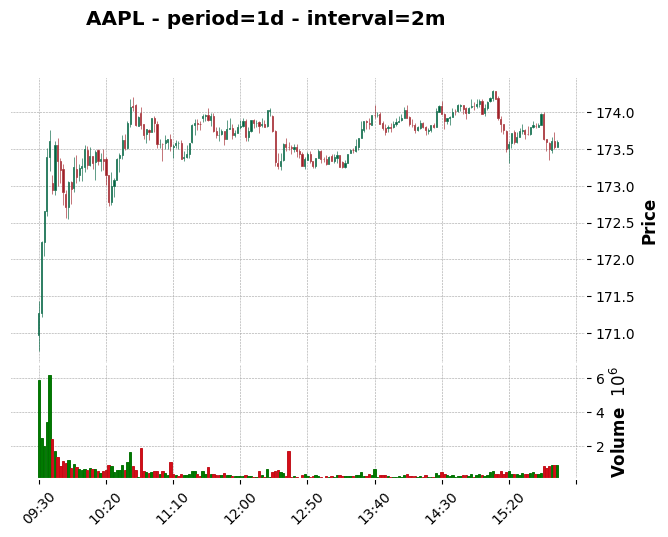

In [4]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import pprint
import datetime
import requests
from bs4 import BeautifulSoup

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

ticker = "aapl"
yticker = yf.Ticker(ticker)
def plotprices(ticker,interval:str,period:str):
    #ticker = "hln"
    #interval = "1h" # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    #period = "1y" # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    
    df = ticker.history(period=period,interval=interval) # max, 1y, 3mo, etc
    #yticker = yf.Ticker(ticker)
    mpf.plot(df, type='candle', style='charles', volume=True,title="{} - period={} - interval={}".format(ticker.ticker, period, interval))

plotprices(yticker,'1h','5d')
plotprices(yticker,'1d','3mo')
plotprices(yticker,'2m','1d')
#yticker.info['symbol']
#yticker.ticker

In [5]:
def get_exdividend(yticker):
    stock_info = yticker.info
    if 'exDividendDate' in stock_info.keys():
        #print("found exdividend key")
        if stock_info['exDividendDate'] is not None:
            #print('exdividend is not none')
            if datetime.datetime.fromtimestamp(stock_info['exDividendDate']).date() >= datetime.datetime.today().date():
                #print("exdividend day not in past")
                #print(i+stock_info['exDividendDate'])
                date = datetime.datetime.fromtimestamp(stock_info['exDividendDate'])
                #date = date.date().isoformat()
                date = date.date()
                #print(yticker.ticker+" exdividend: "+date)
                return date
        else:
            print("ex dividend is None")
exdate = get_exdividend(yticker)
if exdate != None:
    print('Exdata: '+exdate.isoformat())
#test if exdiv in next week
    if (exdate - datetime.date.today()).days <= 7:
        print(bcolors.WARNING + "Warning exdata this week!!!")
    else:
        print('No exdata next week')   


Exdata: 2023-05-12
Warning exdata this week!!!


In [7]:
print(yticker.info.keys())
print(yticker.info['boardRisk'])
print(datetime.datetime.fromtimestamp(yticker.info['exDividendDate']))

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryDisp', 'sector', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpriseValue', 'profitMargins', 'sharesOutstanding', 'sharesShort', 'sharesShortPriorMo

In [8]:
def get_news(yticker):
    news = yticker.news
    for i in news:
        print(i['title'],i['link'],datetime.datetime.fromtimestamp((i['providerPublishTime'])))  
get_news(yticker)

Apple Threatens To Take a Bite Out of Regional Banks https://finance.yahoo.com/m/5e26ac71-2c79-3da2-bb5f-dba21a19c4f3/apple-threatens-to-take-a.html 2023-05-07 12:52:54
1 Semiconductor Stock That Could Join Apple, Microsoft, Amazon, and Alphabet in the $1 Trillion Club https://finance.yahoo.com/m/facbc8aa-f5d0-3898-89d6-2f588414eb0e/1-semiconductor-stock-that.html 2023-05-07 11:35:00
Microsoft Stock: Bear vs. Bull https://finance.yahoo.com/m/13a40a60-872f-3d1e-b683-1bc02ba9b81c/microsoft-stock%3A-bear-vs.-bull.html 2023-05-07 11:21:00
Berkshire Hathaway: What you need to know from the annual shareholders meeting https://finance.yahoo.com/video/berkshire-hathaway-know-annual-shareholders-213848679.html 2023-05-06 21:38:48
Buffett addresses stake in Apple, Occidental Petroleum, and issues warning about the streaming business https://finance.yahoo.com/video/buffett-addresses-stake-apple-occidental-213710056.html 2023-05-06 21:37:10
Buffett and Munger Talk AI, Robotics, and More at Berkshi

In [1]:
#add finance check
import requests

url = "https://stock-analysis.p.rapidapi.com/api/v1/resources/key-stats"

querystring = {"ticker":"AAPL"}

headers = {
	"X-RapidAPI-Key": "10f39e82e0mshe9e980b4020b2bap149c58jsnc411748d5df1",
	"X-RapidAPI-Host": "stock-analysis.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'message': 'You are not subscribed to this API.'}
